In [1]:
#read params
# process data


In [65]:
import os
import yaml
import pandas as pd
import numpy as np
import argparse
from sklearn.model_selection import train_test_split

class process_data:
    
    def get_data_func(self, data_path):
        df = pd.read_csv("../" + data_path, sep=',')
        return df
    
    def split_train_test_func(self, config_path):
        train_path = config_path['split_data']["train_path"]
        test_path = config_path['split_data']["test_path"]
        random_state = config_path['base']["random_state"]
        load_path = config_path['load_data']["raw_dataset_csv"]
        df = pd.read_csv("../" + load_path, sep=",")
        test_size = config_path['split_data']["test_size"]
        train, test = train_test_split(df, random_state = random_state, test_size=test_size)
        train.to_csv("../" + train_path, index=False, sep=',')
        test.to_csv("../" + test_path, index=False, sep=',')
    
    def split_raw_data(self, df, config_path):
        cols = [col.replace(' ', '_') for col in df.columns]
        print(cols)
        df.to_csv("../"+ config_path, index=False, header=cols, sep=',')

    def __init__(self, path=''):
        if(path == ''):
            self.path = 'params.yaml'
        self.raw_data = dict()
        with open('../' + self.path) as f:
            self.raw_data  = yaml.safe_load(f)
        print(self.raw_data)
        df = self.get_data_func(self.raw_data['data_source']['s3_source'])
        self.split_raw_data(df, self.raw_data['load_data']['raw_dataset_csv'])
        self.split_train_test_func(self.raw_data)


In [66]:
process_data()

{'base': {'project': 'winequality-project', 'random_state': 42, 'target_col': 'TARGET'}, 'data_source': {'s3_source': 'data_given/winequality.csv'}, 'load_data': {'raw_dataset_csv': 'data/raw/winequality.csv'}, 'split_data': {'train_path': 'data/processed/train_winequality.csv', 'test_path': 'data/processed/test_winequality.csv', 'test_size': 0.3}, 'estimators': {'ElasticNet': {'params': {'alpha': 0.9, 'l1_ratio': 0.4}}}, 'model_dir': 'saved_models'}
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'TARGET']


In [44]:
"a a".replace(" ", "_")

'a_a'

In [73]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv('../data/raw/winequality.csv', sep=',')

In [76]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
df['TARGET'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

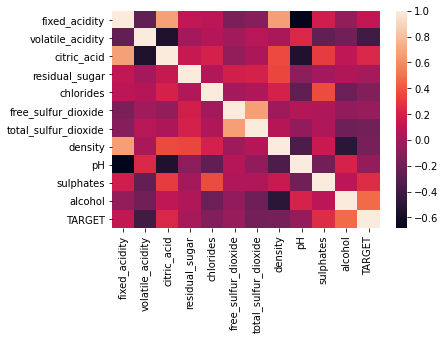

In [78]:
sns.heatmap(df.corr())

## Alocohol has greatest relation with target

In [112]:
df_train = pd.read_csv('../data/processed/train_winequality.csv')
df_test = pd.read_csv('../data/processed/test_winequality.csv')

In [113]:
df_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
1,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5
2,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
4,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8,5


In [106]:
X_train = df_train.drop('TARGET', axis=1)
X_test = df_test.drop('TARGET', axis=1)
y_train = df_train['TARGET']
y_test = df_test['TARGET']

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import ElasticNet
import json
import joblib

In [108]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [132]:
alpha = 0.9
l1_ratio = 0.4

In [109]:
lr = ElasticNet(alpha=0.9, l1_ratio=0.4, random_state=42)

lr.fit(X_train, y_train)


ElasticNet(alpha=0.9, l1_ratio=0.4, random_state=42)

In [110]:
pred_target = lr.predict(X_test)

In [114]:
r2_score(y_test, pred_target)
mean_absolute_error(y_test, pred_target)

0.6424006513778905

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf = RandomForestRegressor(n_estimators=4, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=4, random_state=42)

In [127]:
pred_rd_t = rf.predict(X_test_scaled)
r2 = r2_score(y_test, pred_rd_t)
mae = mean_absolute_error(y_test, pred_rd_t)

In [128]:
1 - ((y_test - pred_rd_t) ** 2).sum()  / ((y_test - y_test.mean()) ** 2).sum()

-0.31497340480151137

In [133]:
scores_file = "../report/scores.json"
params_file = "../report/params.json"

with open(scores_file, "w") as f:
    scores = {
            "rmse": rmse,
            "mae": mae,
            "r2": r2
    }
    json.dump(scores, f, indent=4)

with open(params_file, "w") as f:
    params = {
            "alpha": alpha,
            "l1_ratio": l1_ratio,
    }
    json.dump(params, f, indent=4)

In [136]:
joblib.dump(lr, "../saved_models/model.joblib")

['../saved_models/model.joblib']